A quick comparison of noise levels 

* In garage, enclosed.

* In garage, ethernet extension.

* Outside, syrofoam box, ethernet extension on copper pipe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('magtest_old.txt', skiprows=3, parse_dates=[0], header=None)
df2 = pd.read_csv('magtest_garage_extcable.txt', skiprows=3, parse_dates=[0], header=None)
df3 = pd.read_csv('magtest_old5_backyardbox.txt', skiprows=3, parse_dates=[0], header=None)

df1.columns = ['LocalTime', 'F']
df2.columns = ['LocalTime', 'F', 'X', 'Y', 'Z']
df3.columns = ['LocalTime', 'F', 'X', 'Y', 'Z']



Text(0.5, 1.0, 'In Garage')

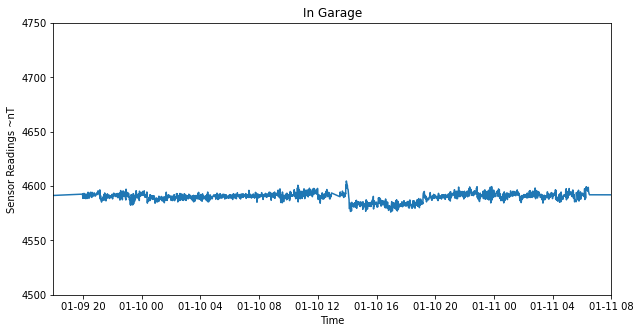

In [10]:
fig1, ax1 = plt.subplots()

ax1.plot(df1['LocalTime'], df1['F'])
ax1.set_ylim(4500,4750)
ax1.set_xlim('2021-01-09 18:00', '2021-01-11 08:00')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('Time')
plt.ylabel('Sensor Readings ~nT')
plt.title('In Garage')

The data in df1 "In Garage" was captured with the sensor inside the enclosure, sitting on my workbench.

Text(0.5, 1.0, 'In Garage, Ethernet Extension')

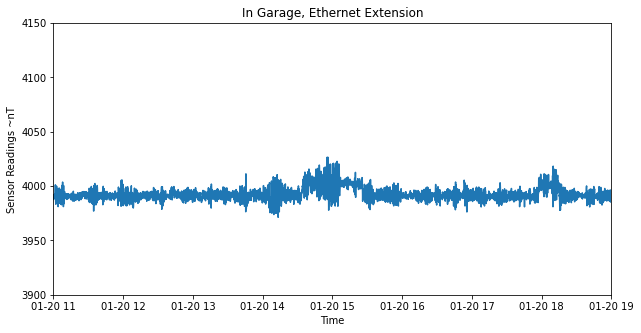

In [3]:
fig2, ax2 = plt.subplots()

ax2.plot(df2['LocalTime'], df2['F'])
ax2.set_ylim(3900,4150)
ax2.set_xlim('2021-01-20 11:00', '2021-01-20 19:00')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('Time')
plt.ylabel('Sensor Readings ~nT')
plt.title('In Garage, Ethernet Extension')

This data was captured on the work bench as well, but this time an ethernet extension cable for remote GPIO was wired up so that the sensor could be located about 4ft away from the Raspberry Pi.

Text(0.5, 1.0, 'Back Yard, Outside, Copper Pipe')

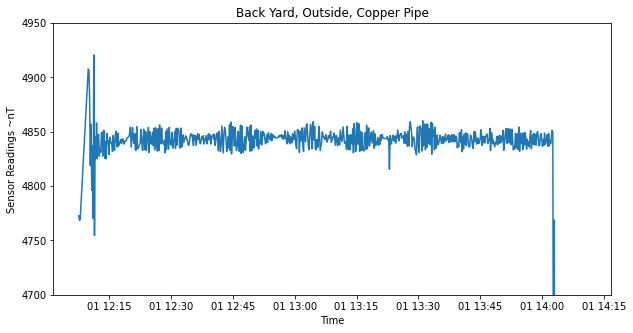

In [4]:
fig3, ax3 = plt.subplots()

ax3.plot(df3['LocalTime'], df3['F'])
ax3.set_ylim(4700,4950)
#ax2.set_xlim('2021-01-09 18:00', '2021-01-11 08:00')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('Time')
plt.ylabel('Sensor Readings ~nT')
plt.title('Back Yard, Outside, Copper Pipe')

In [5]:
#Quantify the noise of each data set. This is essentially a standard deviation calculation

df1.loc[:,'F_mean'] = df1['F'].rolling(window=20).mean()
df2.loc[:,'F_mean'] = df2['F'].rolling(window=20).mean()
df3.loc[:,'F_mean'] = df3['F'].rolling(window=20).mean()

df1.loc[:,'F_delta'] = df1['F_mean'] - df1['F']
df2.loc[:,'F_delta'] = df2['F_mean'] - df2['F']
df3.loc[:,'F_delta'] = df3['F_mean'] - df3['F']

df1['F_delta'] = df1['F_delta']**2
df2['F_delta'] = df2['F_delta']**2
df3['F_delta'] = df3['F_delta']**2

print((df1['F_delta'].sum() / df1['F_delta'].count())**0.5)
print((df2['F_delta'].sum() / df2['F_delta'].count())**0.5)
print((df3['F_delta'].sum() / df3['F_delta'].count())**0.5)

22.197344662743884
425.64969868919394
23.60069477550126


In [38]:
#We can just use the built in Pandas function for standard deviation. I've chosen specific time 
#intervals on which to calculate StdDev in order to avoid any large spikes or shifts in the data.
print("Standard Deviation for Select Intervals \n")
print("Garage                 ", df1[(df1['LocalTime'] > '2021-01-10 00:00')&(df1['LocalTime'] < '2021-01-10 12:00')]['F'].std())
print("Garage with Ext Cable  ", df2[(df2['LocalTime'] > '2021-01-20 11:00')&(df2['LocalTime'] < '2021-01-20 14:30')]['F'].std())
print("Outside, with Ext Cable", df3[(df3['LocalTime'] > '2021-02-01 12:20')&(df3['LocalTime'] < '2021-02-01 13:45')]['F'].std())

Standard Deviation for Select Intervals 

Garage                  2.4379567072039467
Garage with Ext Cable   4.946804341835493
Outside, with Ext Cable 6.89580510484637


### Thoughts on noise

At some point I suspected that there was some interference happening within the raspberry pi enclosure and that is why I created the extension cable. However, that does not seem to have improved the data and if anything, it may have made it worse. In the end, I don't think moving the sensor away from the Pi buys very much in terms of noise reduction. Additionally, the periodic "swells" in noise seen outside in the back yard are very interesting. That is the only place where I see that sort of behavior.